# Introduction

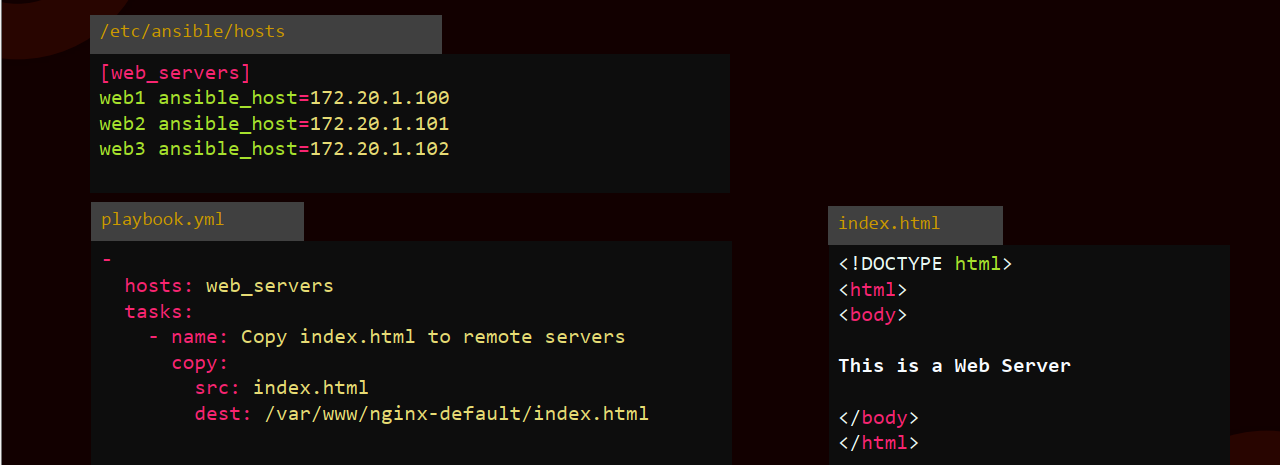

Let's start with a simple scenario.

We're setting up web servers, and we wanna copy our webpage and `index.html` file stored locally to the web server's default `index.html` location.
* We use Ansible's `copy` module to copy the local file to the remote location on all web servers.
* Assuming that Nginx is already installed on these web servers, we are on the playbook now.

The `index.html` file is copied to all of those web servers. 

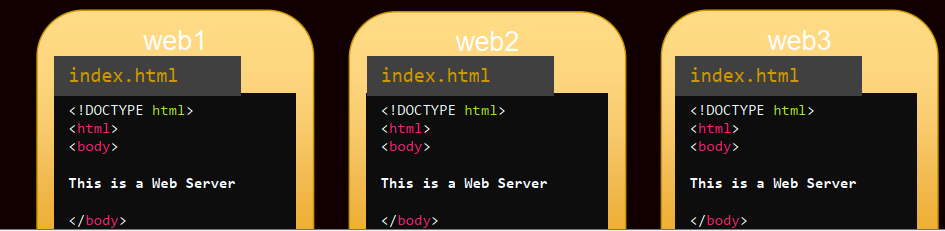

When you access the web server, you see the webpage that says, **"This is a Web Server"**.

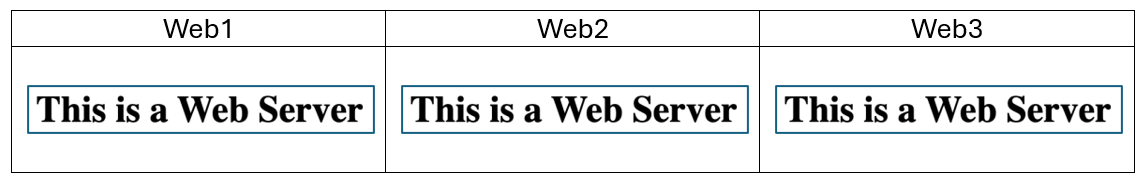

# Using Jinja2 Templates

Now, we are requested to make the web server **print its hostname and IP address** when the webpage is displayed.
* One way to do that is to **copy a separate version of the file to each server**, which has the hostname in it.
* The files are still the same except for the value of the hostname.

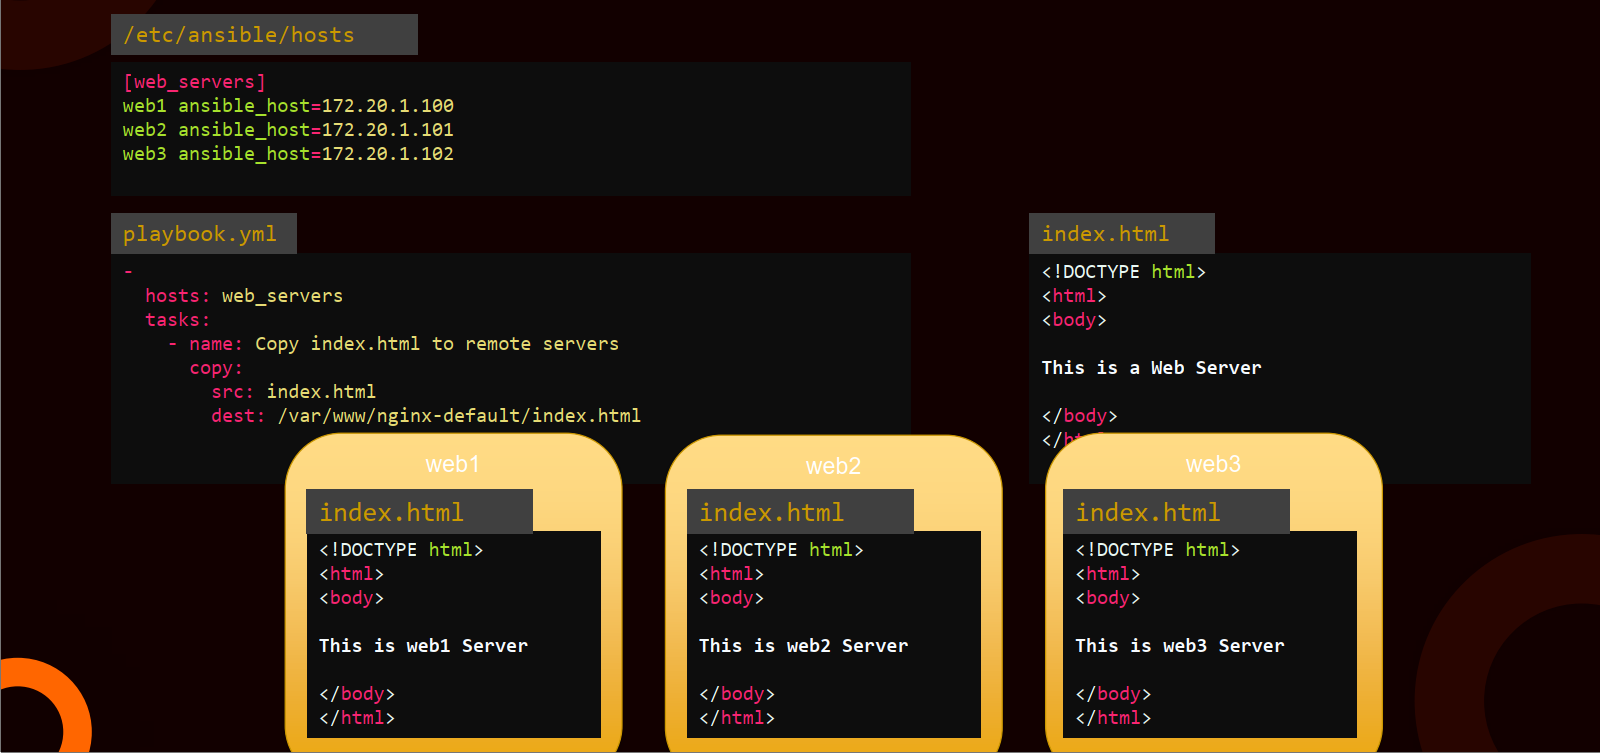

---

**Only if we could replace the name inside with a variable like this, as we do in the playbooks.**

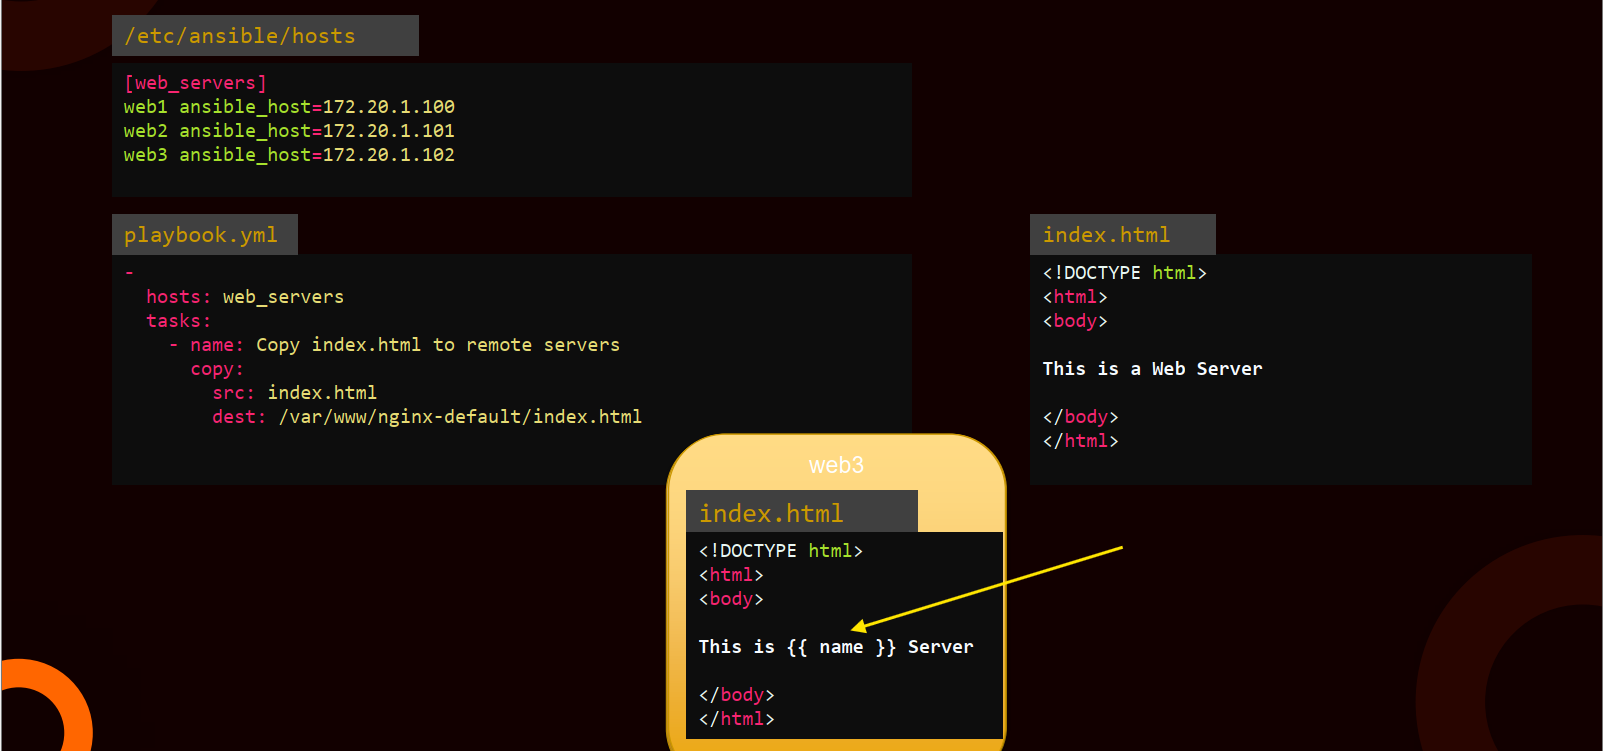

---

**Can we specify a variable inside a file that we want to copy, like this?**
* Well, we could, but not like this.
* The `index.html` file is no longer a valid HTML file.
* It is now our Jinja2 template that we will use to generate a valid HTML file for each of our servers.

We wanna convert the `index.html` file into a **Jinja2 template** with some variables inside it, so the file extension to be used is `.j2`.
* A best practice is to simply add the .j2 extension to whatever file you have converted to a Jinja2 template.
* In this case, `index.html.j2`.

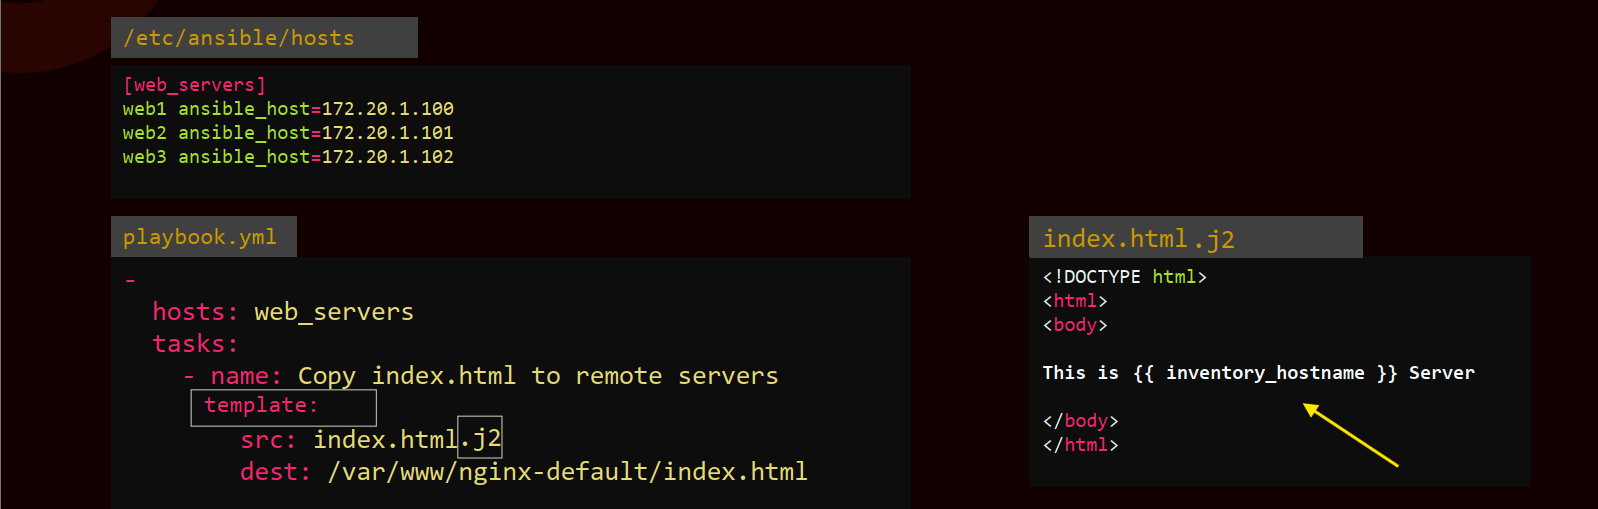

So we now have a **template file** that needs to be processed to get the variables replaced with actual values before they can be copied over to the target hosts.
* But the `copy` module that we are using now does not have the ability to perform variable interpolation.
* It will simply copy the file as is.

That's where we use the `template` module instead of the `copy` module.
* The options for both modules are similar, but this time, the **source file** is going to be the **Jinja2 template file** we used.
* While we're at it, the actual variable that helps us to get the name specified in the inventory file for a host is the `inventory_hostname` variable.

When the playbook is run:
* ansible first takes the **Jinja2 template**,
* then does **variable interpolation**,
* converts the **template file** into **files to be copied into each server**, and
* then copies them to the target servers.

# Visualize Jinja2 templating process & conversion by Ansible

**Let's see what happens when the playbook is run now in our visualization mode.**

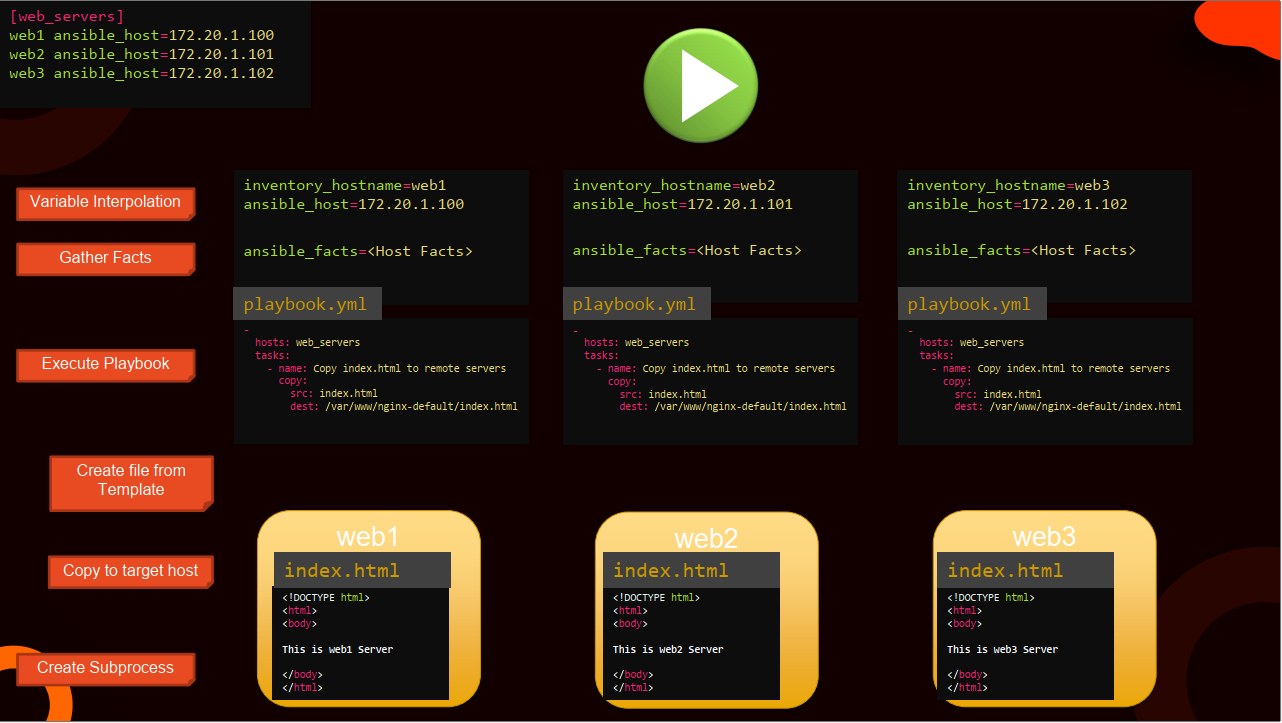

1. **Create subprocesses**: When the playbook is run, Ansible **creates three separate subprocesses** for each host.
2. **Variable Interpolation**: Each process creates its **own set of parameters** for each host by performing its own **variable interpolation**.
3. **Gather Facts**: It then **proceeds to gather facts from the host**, so each subprocess now has a lot more information about the host.
4. **Execute Playbooks**:
   * Then, the process starts executing playbooks.
   * Each subprocess executes the playbook targeting the respective host.
5. **Execute Template Task**:
    * Each subprocess executes the template task for the respective host by taking the `index.html.j2` file.
    * **Performing variable interpolation** on it by replacing the variables with their values.
    * Thus generating an `index.html` file from it.
6. **Copy `index.html` to target host**: The `template` module then copies over the files to the target hosts.

---


# More Examples of Jinja2 Templating

The `index.html` file was just a simple example. 
* You may use the same procedure for different configuration files.
* For example:
    * an **Nginx configuration file**
    * or a **Redis configuration file** like this.

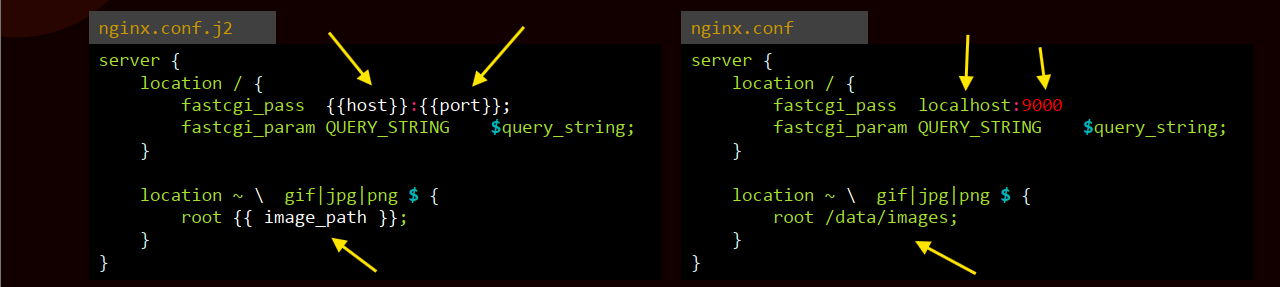

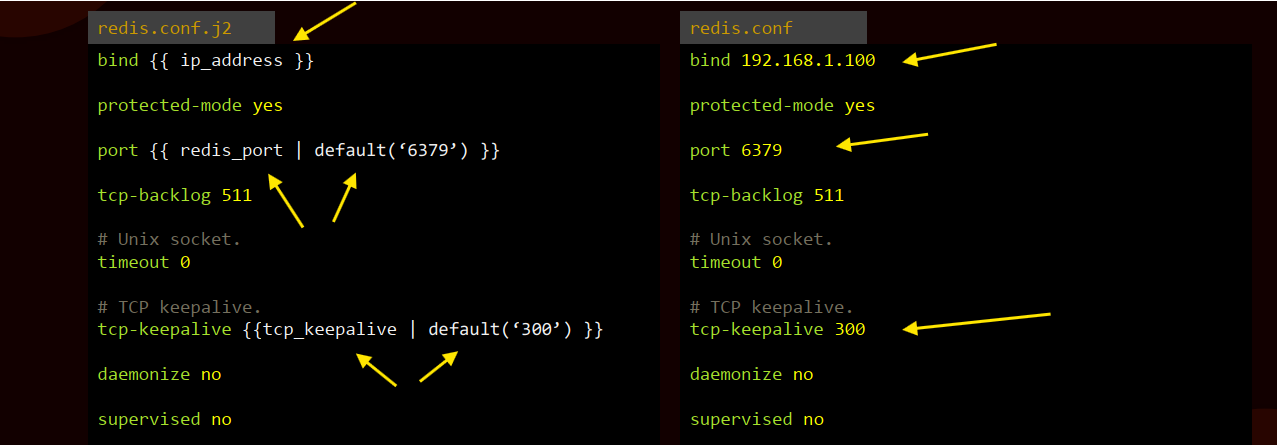

Remember that you can use **Jinja2 filters** within these.

For example, we use the `default` filter to instruct Jinja2 to use a default value of **6379** for the `port` if it is not specified explicitly.

You could use **Jinja2 blocks** as well.
* For example, to generate a list of `nameserver` entries, in the `/etc/resolve.conf` file.
* You could use **Jinja2 for loop** using an array to generate a target file.

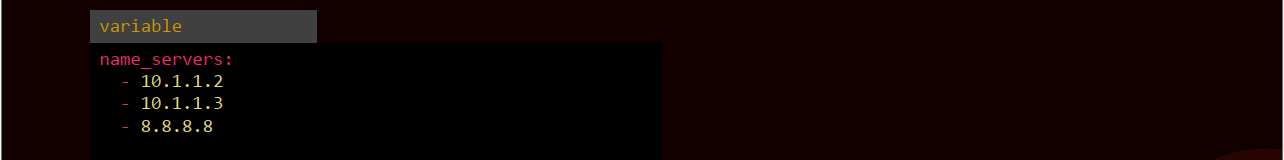

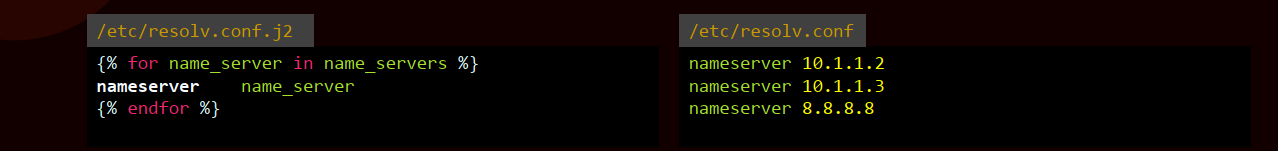


When using **templates in roles**, create them under the `templates` directory.

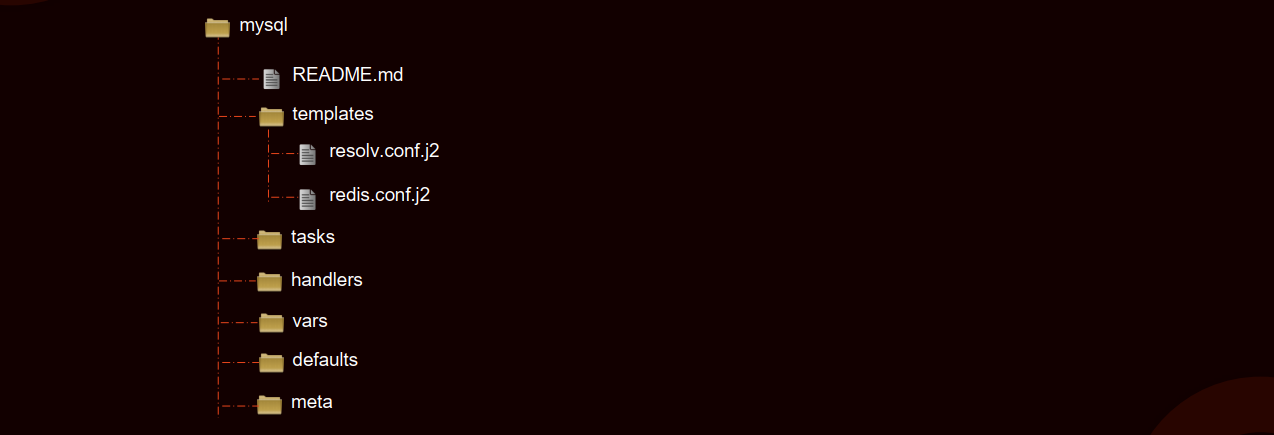